### Defferential Evolution (Sphere Func.)


In [470]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [471]:
D = 10 # Dimensi dari permasalahan
maxit = 495 #Max iterasi
ukuranPopulasi = 10
LB = -10 #Batas Bawah
UB = 10 #Batas Atas
CR = 0.9 
F = 0.5



In [472]:
import random
def initPopulasi(ukuranPopulasi, D, UB, LB): #Inisialisasi setiap baris kolom
    P = np.empty((ukuranPopulasi,D))
    for i in range(ukuranPopulasi):
        for j in range(D):
            P[i][j]= (random.random()*(UB-LB))+LB
    return P

P = initPopulasi(ukuranPopulasi, D, UB, LB)
print(P)

[[ 1.25854374  6.00496673 -0.80081935 -1.63653239 -5.90776991  2.19084589
   1.69184659 -5.2834609  -0.77973984  3.56849395]
 [ 2.23084456  3.09611376  5.01701021  2.0874062  -5.16332365 -1.42273365
  -1.04396225  6.93925027 -9.35876768 -8.43459904]
 [ 4.69102819  9.88138155 -7.73826089  0.34543733 -5.35028949 -4.44966847
  -3.34784932 -2.55603186  4.43899427  9.08185793]
 [ 9.36851766  5.95287885  4.07355641  9.59290151 -1.55498599  4.80833032
  -6.7427817   8.60564353  3.94862647 -1.56634069]
 [ 3.41190335 -5.01320158 -9.89743295 -3.87440944  9.14247475  4.03988795
  -0.23720503  0.09225919  7.46266585  7.73424011]
 [-0.40132684  2.35851844  8.78183253  4.82088921  9.85156514  1.54809588
  -2.35870911  9.89695848  8.13541952 -0.93450151]
 [ 8.99687731  2.54131602 -8.10051928 -3.56089312 -4.19691749  6.77286244
   3.18384957  1.67901093 -2.08168662  7.22279119]
 [ 2.82114329 -3.71431806  2.56267199  9.51030833 -7.89746924 -5.91139758
  -5.89012647 -0.02026072 -4.43484796 -8.92449722]


In [473]:
def funcSphere(populasi):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    dimensi = ukuran[1]
    
    Fobj = np.empty(ukuranPopulasi)
    
    for i in range (ukuranPopulasi):
        d = 0
        for j in range (dimensi):
            d = d + populasi[i][j]**2
            # d = d + np.sum(np.abs(populasi[i][j])) + np.product(np.abs(populasi[i][j])) #schwefel 2.22
            # d = d + np.sum(100*(populasi[i][j]+1)-(populasi[i][j]))**2 + (populasi[i][j]-1)**2 #Generalize rosenbrock
            # d =  d + np.sum( (populasi[i][j]**2) - (10*math.cos(2*math.pi*populasi[i][j])) + 10 ) #rastrigins
        Fobj[i] = d
    return Fobj
    
Fobj = funcSphere(P)
print(Fobj)



[124.78410593 280.74637114 347.99881016 394.92881247 365.22367093
 376.10680392 298.64435054 350.09142937 411.11000333 535.25610075]


In [474]:
def crossOver(populasi,F,j):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    Dimensi = ukuran[1]
    
    r1 = random.randint(0, ukuranPopulasi-1)
    r2 = random.randint(0, ukuranPopulasi-1)
    r3 = random.randint(0, ukuranPopulasi-1)
    
    while r1 == r2:
        r2 = (r2 + 1)%ukuranPopulasi
        
    while r3 == r1 or r3 == r2:
        r3 = (r3 + 1)%ukuranPopulasi
        
    v = P[r3][j] + F*(P[r1][j] - P[r2][j])
    return v

v = crossOver(P,F,1)
print(v)

15.032218194692597


In [475]:
P = initPopulasi(ukuranPopulasi, D, UB, LB)
print("Inisialisasi Populasi :\n",P)
print(P)

Fobj = funcSphere(P)
print(Fobj)
print("\nFungsi Objective :\n",Fobj)

U = np.empty((1,D))
bestFobj = np.empty((maxit+1))
bestFobj[0] = Fobj.min()

for it in range(maxit):
    for i in range(ukuranPopulasi):
        for j in range(D):
            U[0][j] = P[i][j]

        jrand=random.randint(0,D)
        
        for j in range(D):
            if random.random() < CR or j == jrand:
                v = crossOver(P,F,j)
                U[0][j] = v
                
        FobjU = funcSphere(U)
        
        if FobjU < Fobj[i]:
            Fobj[i] = FobjU
            for j in range(D):
                P[i][j] = U[0][j]
                
    bestFobj[it+1] = Fobj.min()

    print("\nNilai Optimal : \n",bestFobj)

    for i in range(30):
        bestFobj

Streaming output truncated to the last 5000 lines.
 9.09315763e-001 7.69522930e-001 7.69522930e-001 7.69522930e-001
 6.87996259e-001 6.49335430e-001 6.48189791e-001 6.08875832e-001
 6.08875832e-001 5.18710464e-001 4.98908265e-001 4.98908265e-001
 4.88678126e-001 4.53025775e-001 4.53025775e-001 4.53025775e-001
 4.53025775e-001 4.53025775e-001 4.51692244e-001 4.25187429e-001
 4.25187429e-001 4.25187429e-001 4.25187429e-001 4.21967653e-001
 4.21967653e-001 4.20161659e-001 4.20161659e-001 4.20161659e-001
 4.12482100e-001 4.07165505e-001 4.05548909e-001 4.05548909e-001
 4.05548909e-001 4.05548909e-001 4.05548909e-001 4.04260237e-001
 4.04260237e-001 4.00996995e-001 4.00996995e-001 3.99947037e-001
 3.99947037e-001 3.99552391e-001 3.98549389e-001 3.98549389e-001
 3.98549389e-001 3.98477790e-001 3.98477790e-001 3.98477790e-001
 3.96501906e-001 3.96501906e-001 3.96501906e-001 3.96501906e-001
 3.96242195e-001 3.96242195e-001 3.95874523e-001 3.95853586e-001
 3.95853586e-001 3.95853586e-001 3.9504

In [476]:
import statistics as st
print("Nilai Mean : ",st.mean(bestFobj))
print("Nilai Standard Deviation : ",st.stdev(bestFobj))
print("Nilai Minimal : ",np.min(bestFobj))

Nilai Mean :  6.253351485484217
Nilai Standard Deviation :  28.59080188472914
Nilai Minimal :  0.3915633902944092


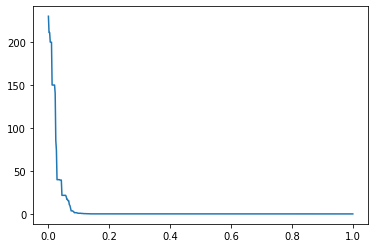

In [477]:
x = np.linspace(0, 1, maxit+1)
plt.plot(x, bestFobj, label= 'f=Fobj')
plt.show()

### Genetic Algorithm

In [478]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [479]:
N = 3
rows, cols = (N, 4)
induk = [[0 for i in range(cols)] for j in range(rows)]
print (induk)

N_Anak = 6
rows, cols = (N_Anak, 4)
anak = [[0 for i in range(cols)] for j in range(rows)]
print(anak)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [480]:
#Inisialiasi Parameter
Pc = 0.9
Pm = 0.1

for i in range(N):
    a = random.randint(0, 15)
    induk[i] = [int (x) for x in '{:04b}'.format(a)]
    print(a, induk[i])


14 [1, 1, 1, 0]
10 [1, 0, 1, 0]
0 [0, 0, 0, 0]


In [481]:
#Function cross over
def crossover(ind1=[], ind2=[]):
    anak1 = [0, 0, 0, 0]
    anak2 = [0, 0, 0, 0]
    
    
    anak1[0] = ind1[0]
    anak1[1] = ind1[1]
    anak1[2] = ind2[2]
    anak1[3] = ind2[3]
    
    anak2[0] = ind2[0]
    anak2[1] = ind2[1]
    anak2[2] = ind1[2]
    anak2[3] = ind1[3]
    
    return anak1, anak2


In [482]:
#Function  mutasi
def mutasi(ind=[]):
    ind[1] = 1 - ind[1]
    return ind


In [483]:
#Function hitung Int
def hitungInt(ind = []):
    a = ind[3] * 1
    a = a + ind[2] * 2
    a = a + ind[1] * 4
    a = a + ind[0] * 8
    return a


In [484]:
#Buat function untuk melakukan hitung fitness
def hitungFitness(ind = []):
    a = hitungInt(ind)
    y = a**2 #sphere
    #y = np.sum(np.abs(a)) + np.product(np.abs(a)) #schwefel 2.22
    #y = np.sum(100*(a+1)-(a))**2 + (a-1)**2 #Generalize rosenbrock
    # y = np.sum( (a**2) - (10*math.cos(2*math.pi*a)) + 10 ) #rastrigins

    return y

In [485]:
i = 1
epochs = 495
MaxFitness = [0 for i in range(epochs)] 
angkaFitness = [0 for i in range(epochs)]

#nilai fitness induk
for j in range(N):
    if (hitungFitness(induk[j])>MaxFitness[0]):
        MaxFitness[0] = hitungFitness(induk[j])


In [469]:
#'epochs' kali
for i in range(30):
  while i < epochs:
    print("Iterasi: ", i+1)   
    #Reproduksi 
    a = random.random()
    if (a<Pc):
        #Cross over
        anak[0], anak[1] = crossover(induk[0], induk[1])
        anak[2], anak[3] = crossover(induk[0], induk[2])
        anak[4], anak[5] = crossover(induk[1], induk[2])
    else:
        #Mutasi
        for j in range(N):
            induk [j] = mutasi(induk[j])
    #Elistism
    minFitness = 10
    idx = 0
    idxanak = 0
    #Cari minFitness (induk terburuk)
    for j in range(len(induk)):
        #print(minFitness, hitungFitness(induk[j]))
        if (hitungFitness(induk[j])<minFitness):
            minFitness = hitungFitness(induk[j])
            idx = j
    
    #cari maxFit (Anak terbaik)
    maxFit = -10
    for j in range(len(anak)):
        if (hitungFitness(anak[j])>maxFit):
            maxFit = hitungFitness(anak[j])
            idxanak = j
    #individual replacement
    if (minFitness < maxFit):
        induk[idx] = anak[idxanak]
    
    #populasi induk paling baik
    for j in range(N):
        if (hitungFitness(induk[j])>MaxFitness[i]):
            MaxFitness[i] = hitungFitness(induk[j])
    i+=1
    
    print(MaxFitness)

Iterasi:  1
[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 22

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 156
[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Iterasi:  129
[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Iterasi:  307
[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 130
[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225,

In [486]:
print("Nilai Mean : ", st.mean(MaxFitness))
print("Nilai Standard Deviation : ", st.stdev(MaxFitness))
print("Nilai Minimal : ",np.min(MaxFitness))

Nilai Mean :  0.39595959595959596
Nilai Standard Deviation :  8.809544869519696
Nilai Minimal :  0


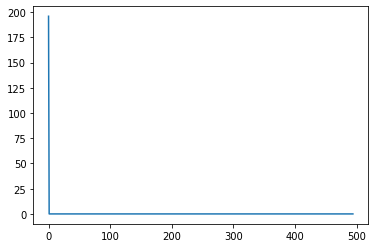

In [487]:
x = [i for i in range(epochs)] 
plt.plot(x, MaxFitness)  